Generating discrete gap spectrum (N=500000000)...


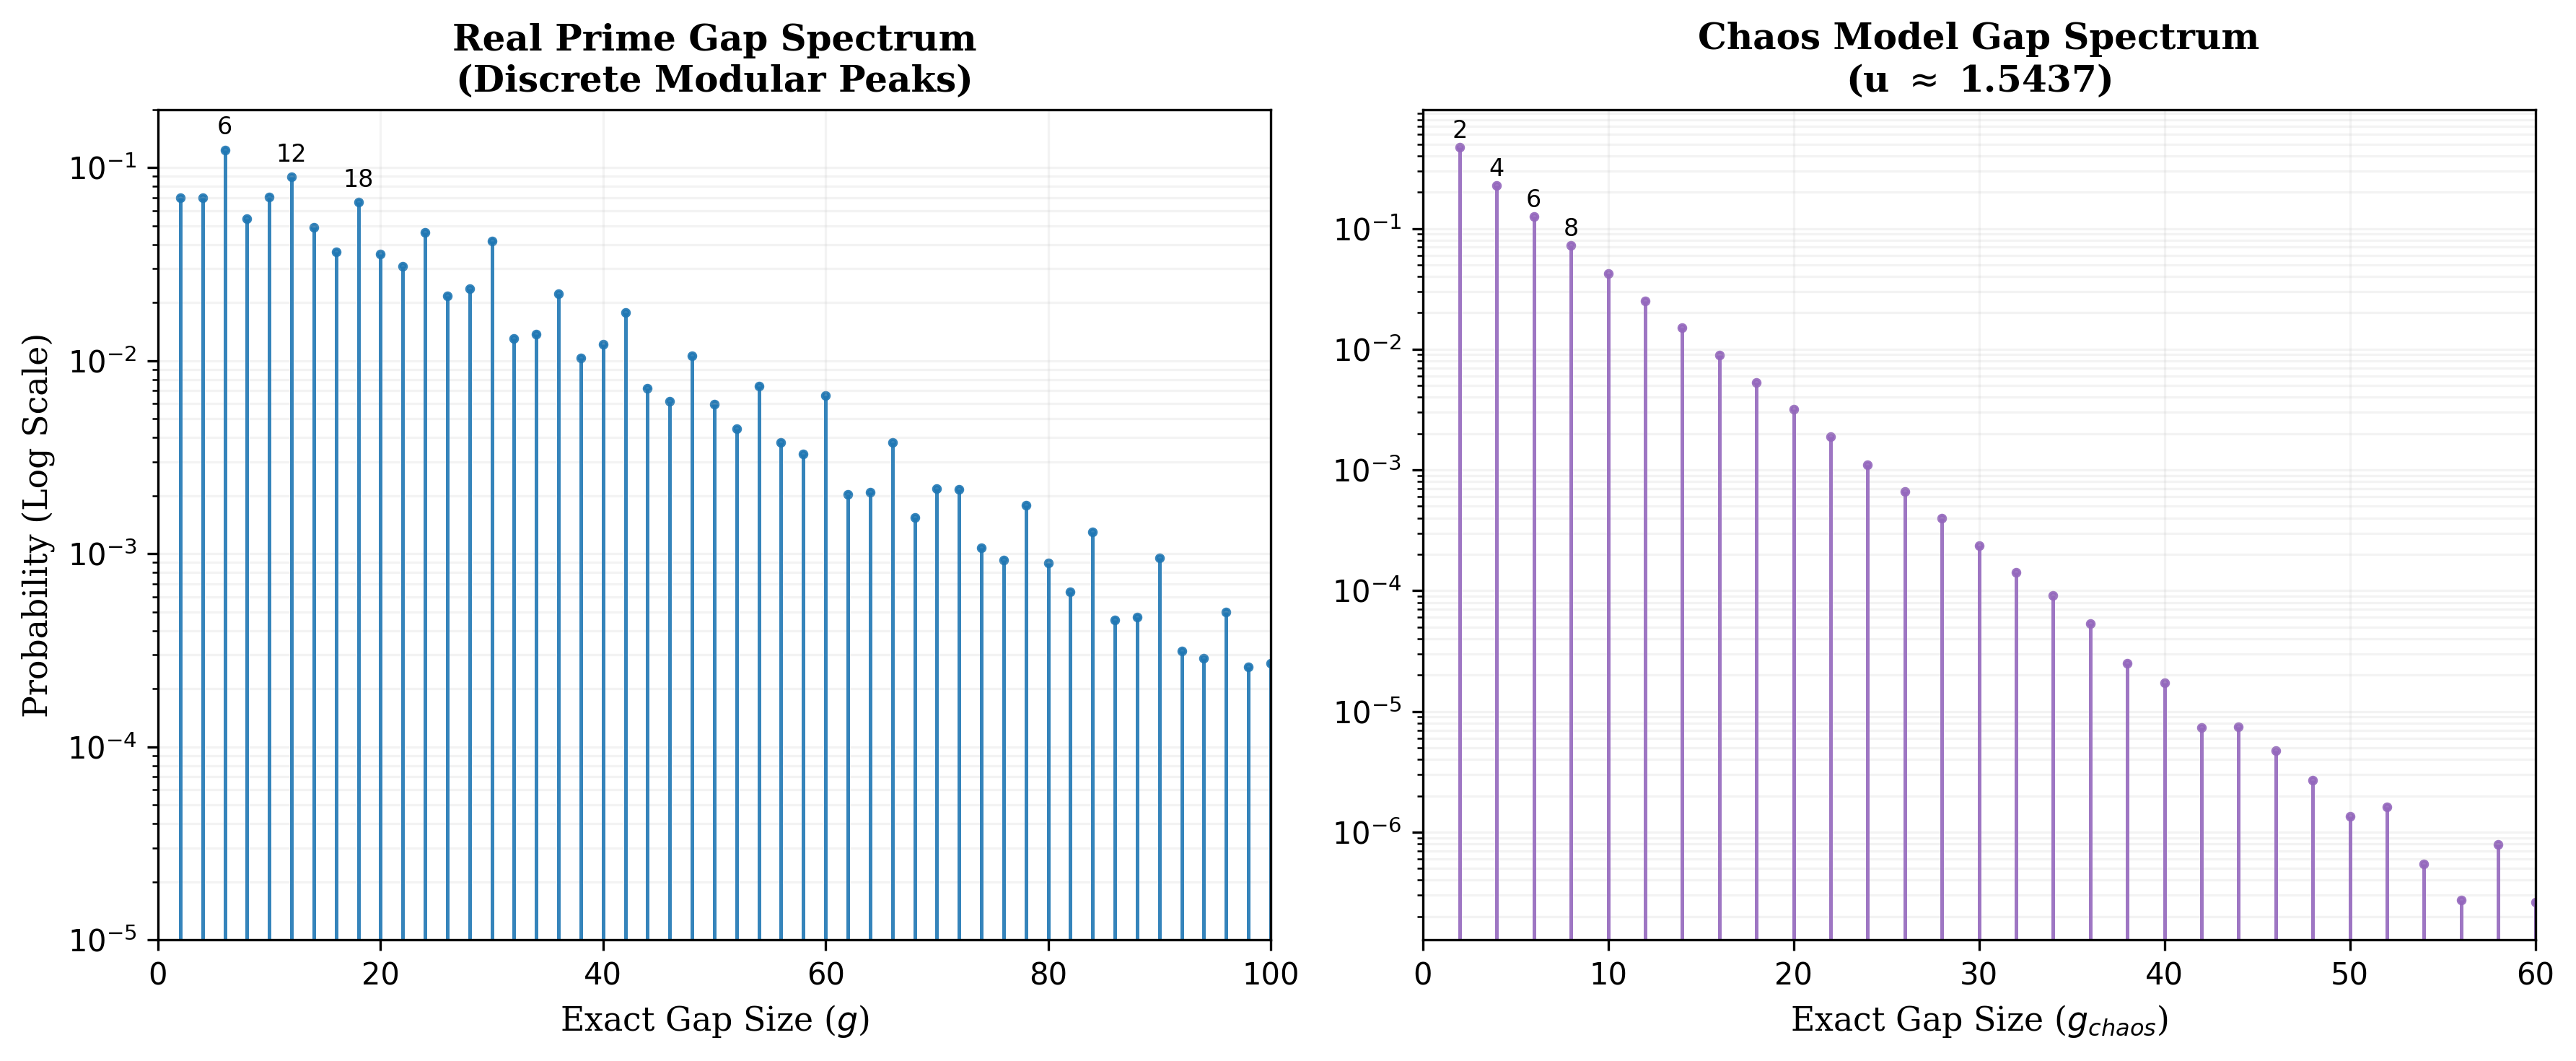

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_discrete_gap_spectrum(limit=500000000):
    print(f"Generating discrete gap spectrum (N={limit})...")
    
    # --- 1. 数据生成 (保持不变) ---
    # 真实素数
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[0:2] = False
    for i in range(2, int(limit**0.5) + 1):
        if is_prime[i]:
            is_prime[i*i : limit+1 : i] = False
    primes = np.nonzero(is_prime)[0]
    real_gaps = np.diff(primes)
    
    # 混沌模型
    u = 1.543689012692076
    x = 0.1
    # 预热
    for _ in range(10000): x = 1 - u * x**2
    
    # 快速生成
    sim_len = limit
    x_vals = np.zeros(sim_len)
    x_curr = x
    for i in range(sim_len):
        x_curr = 1 - u * x_curr**2
        x_vals[i] = x_curr
        
    is_L = (x_vals < 0)
    chaos_indices = np.nonzero(is_L)[0]
    chaos_gaps = np.diff(chaos_indices)

    # --- 2. 核心处理：统计离散频率 ---
    def get_gap_spectrum(gaps, max_gap=100):
        # 统计每个整数间隙出现的次数
        # 使用 np.bincount 可以快速统计 0 到 max_gap 的每个整数
        counts = np.bincount(gaps)
        # 截取我们需要的部分
        if len(counts) > max_gap:
            counts = counts[:max_gap+1]
        # 归一化为概率密度
        total = np.sum(counts) # 注意：这里用全量的总和还是截断的总和？通常用全量更准确
        # 这里为了展示局部形状，用 len(gaps) 做分母
        probs = counts / len(gaps)
        x_axis = np.arange(len(probs))
        return x_axis, probs

    # 获取前100个间隙的频谱
    x_real, y_real = get_gap_spectrum(real_gaps, max_gap=100)
    
    # 获取前60个混沌间隙的频谱
    x_chaos, y_chaos = get_gap_spectrum(chaos_gaps, max_gap=60)

    # --- 3. 绘图：使用 vlines 画细线 ---
    plt.figure(figsize=(12, 5), dpi=300)
    
    # 子图1：真实素数
    plt.subplot(1, 2, 1)
    # 绘制垂直线：x位置, y下限(0), y上限(概率)
    plt.vlines(x_real, 0, y_real, colors='#1f77b4', linewidth=1.2, alpha=0.9, label='Prime Gaps')
    # 在顶点加一个小点，增加可读性
    plt.scatter(x_real, y_real, s=5, color='#1f77b4', alpha=0.9)
    
    plt.yscale('log')
    plt.title('Real Prime Gap Spectrum\n(Discrete Modular Peaks)', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.xlabel('Exact Gap Size ($g$)', fontsize=11, fontfamily='serif')
    plt.ylabel('Probability (Log Scale)', fontsize=11, fontfamily='serif')
    plt.xlim(0, 100)
    plt.ylim(1e-5, 0.2) # 固定Y轴范围以便对比
    plt.grid(True, which="both", ls="-", alpha=0.15)
    
    # 标注几个显著的峰值 (6, 12, 18)
    for k in [6, 12, 18]:
        if k < len(y_real):
            plt.text(k, y_real[k]*1.2, str(k), ha='center', fontsize=8, color='black')

    # 子图2：混沌模型
    plt.subplot(1, 2, 2)
    plt.vlines(x_chaos, 0, y_chaos, colors='#9467bd', linewidth=1.2, alpha=0.9, label='Chaos Gaps')
    plt.scatter(x_chaos, y_chaos, s=5, color='#9467bd', alpha=0.9)
    
    plt.yscale('log')
    plt.title(f'Chaos Model Gap Spectrum\n(u $\\approx$ {u:.4f})', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.xlabel('Exact Gap Size ($g_{chaos}$)', fontsize=11, fontfamily='serif')
    plt.xlim(0, 60)
    # plt.ylim(1e-5, 0.2) # 可选：为了视觉对比可以设为一样，或者自动
    plt.grid(True, which="both", ls="-", alpha=0.15)
    
    # 标注显著峰值
    # 混沌模型通常在 3, 5, 8 等位置有峰值（取决于揉捏序列）
    # 自动找几个高的标一下
    top_indices = np.argsort(y_chaos)[-4:] # 找最高的4个
    for k in top_indices:
        if k > 0 and y_chaos[k] > 1e-4:
            plt.text(k, y_chaos[k]*1.2, str(k), ha='center', fontsize=8, color='black')

    plt.tight_layout()
    plt.savefig('discrete_gap_spectrum.png')
    plt.show()

plot_discrete_gap_spectrum()